Mounted at /content/drive
Original class distribution: [39495 10324  2766]
Class distribution after SMOTE: [31596 31596 31596]
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best KNN Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}

Training Metrics (after SMOTE and tuning):
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Testing Metrics:
Accuracy: 0.4265
Precision: 0.5980
Recall: 0.4265
F1 Score: 0.4852

Classification Report (Testing):
                 precision    recall  f1-score   support

         Normal       0.74      0.47      0.58      7899
Moderate Stress       0.19      0.30      0.23      2065
     Depression       0.05      0.21      0.08       553

       accuracy                           0.43     10517
      macro avg       0.33      0.33      0.30     10517
   weighted avg       0.60      0.43      0.49     10517



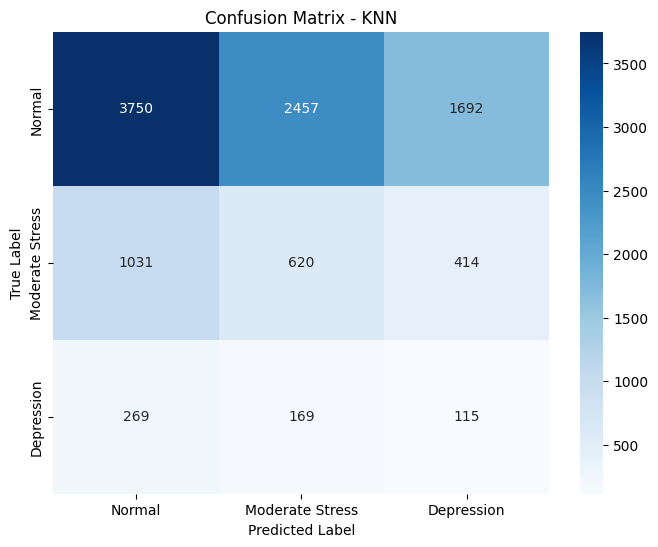

In [ ]:
!pip install imbalanced-learn

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
from google.colab import drive
drive.mount('/content/drive')
cleaned_dataset_path = '/content/drive/My Drive/ML Mental Health Monitoring System/data.csv'
data = pd.read_csv(cleaned_dataset_path)

# Define features and target
features = [
    'Heart_Rate',
    'Blood_Pressure_Systolic',
    'Blood_Pressure_Diastolic',
    'Skin_Temperature',
    'Respiration_Rate',
    'Sleep_Duration',
    'Activity_Levels',
    'Mood',
    'Stress_Level',
    'Resilience_Factors'
]
target = 'Mental_Health_Status'

X = data[features]
y = data[target]

# Handle missing values
X = X.fillna(X.median())

# Encode categorical features (if any)
categorical_columns = ['Mood', 'Stress_Level']
for col in categorical_columns:
    if X[col].dtype == 'object' or X[col].dtype.name == 'category':
        X[col] = LabelEncoder().fit_transform(X[col])

# Encode target if needed
if y.dtype == 'object' or y.dtype.name == 'category':
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)
    class_names = label_encoder.inverse_transform([0, 1, 2])  # Adjust if you have more or fewer classes
else:
    y_encoded = y.astype(int).values
    # Define class_names if you know them
    class_names = ['Normal', 'Moderate Stress', 'Depression']

# Check class distribution
class_counts = np.bincount(y_encoded)
print("Original class distribution:", class_counts)

# Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=100, stratify=y_encoded
)

# Apply SMOTE to handle class imbalance
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
print("Class distribution after SMOTE:", np.bincount(y_train_res))

# Scale Features (KNN is sensitive to feature scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

# Parameter grid for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn = KNeighborsClassifier()

grid_search_knn = GridSearchCV(
    estimator=knn,
    param_grid=param_grid_knn,
    cv=5,
    scoring='f1_weighted',  # Use f1_weighted to handle imbalance better
    n_jobs=-1,
    verbose=1
)

grid_search_knn.fit(X_train_scaled, y_train_res)

best_params_knn = grid_search_knn.best_params_
best_knn_model = grid_search_knn.best_estimator_

print("Best KNN Parameters:", best_params_knn)

# Make predictions
y_pred_train = best_knn_model.predict(X_train_scaled)
y_pred_test = best_knn_model.predict(X_test_scaled)

# Evaluation Metrics
metrics_train = {
    "Accuracy": accuracy_score(y_train_res, y_pred_train),
    "Precision": precision_score(y_train_res, y_pred_train, average='weighted', zero_division=0),
    "Recall": recall_score(y_train_res, y_pred_train, average='weighted', zero_division=0),
    "F1 Score": f1_score(y_train_res, y_pred_train, average='weighted', zero_division=0)
}

metrics_test = {
    "Accuracy": accuracy_score(y_test, y_pred_test),
    "Precision": precision_score(y_test, y_pred_test, average='weighted', zero_division=0),
    "Recall": recall_score(y_test, y_pred_test, average='weighted', zero_division=0),
    "F1 Score": f1_score(y_test, y_pred_test, average='weighted', zero_division=0)
}

print("\nTraining Metrics (after SMOTE and tuning):")
for metric, value in metrics_train.items():
    print(f"{metric}: {value:.4f}")

print("\nTesting Metrics:")
for metric, value in metrics_test.items():
    print(f"{metric}: {value:.4f}")

print("\nClassification Report (Testing):")
print(classification_report(y_test, y_pred_test, target_names=class_names, zero_division=0))

# Confusion Matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Original class distribution: [39495 10324  2766]
Class distribution after SMOTE: [31596 31596 31596]
Fitting 5 folds for each of 72 candidates, totalling 360 fits

Best KNN Pipeline Parameters: {'knn__metric': 'euclidean', 'knn__n_neighbors': 3, 'knn__weights': 'distance', 'pca__n_components': None}

Training Metrics (after SMOTE, PCA, and tuning):
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Testing Metrics:
Accuracy: 0.4245
Precision: 0.6019
Recall: 0.4245
F1 Score: 0.4849

Classification Report (Testing):
                 precision    recall  f1-score   support

         Normal       0.75      0.47      0.58      7899
Moderate Stress       0.20      0.32      0.24      2065
     Depression       0.04      0.17      0.07       553

       accuracy                           0.42     10517
      macro avg       0.33      0.32      0.30 

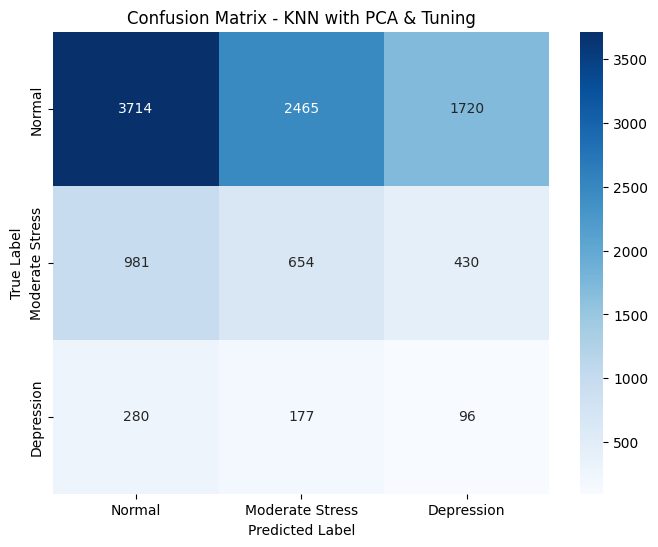

In [ ]:
!pip install imbalanced-learn

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, classification_report, confusion_matrix)
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
from google.colab import drive
drive.mount('/content/drive')
cleaned_dataset_path = '/content/drive/My Drive/ML Mental Health Monitoring System/data.csv'
data = pd.read_csv(cleaned_dataset_path)

# Define features and target
features = [
    'Heart_Rate',
    'Blood_Pressure_Systolic',
    'Blood_Pressure_Diastolic',
    'Skin_Temperature',
    'Respiration_Rate',
    'Sleep_Duration',
    'Activity_Levels',
    'Mood',
    'Stress_Level',
    'Resilience_Factors'
]
target = 'Mental_Health_Status'

X = data[features]
y = data[target]

# Handle missing values
X = X.fillna(X.median())

# Encode categorical features (if any)
categorical_columns = ['Mood', 'Stress_Level']
for col in categorical_columns:
    if X[col].dtype == 'object' or X[col].dtype.name == 'category':
        X[col] = LabelEncoder().fit_transform(X[col])

# Encode target if needed
if y.dtype == 'object' or y.dtype.name == 'category':
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)
    # Adjust class names based on your classes
    class_names = label_encoder.inverse_transform([0, 1, 2])
else:
    y_encoded = y.astype(int).values
    # Define class_names if known
    class_names = ['Normal', 'Moderate Stress', 'Depression']

# Check class distribution
class_counts = np.bincount(y_encoded)
print("Original class distribution:", class_counts)

# Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=100, stratify=y_encoded
)

# Apply SMOTE to handle class imbalance
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
print("Class distribution after SMOTE:", np.bincount(y_train_res))

# Define a pipeline with scaling, PCA, and KNN
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('knn', KNeighborsClassifier())
])

# Parameter grid for KNN + PCA
param_grid = {
    'pca__n_components': [None, 5, 8],           # Try no PCA, or reducing to 5 or 8 components
    'knn__n_neighbors': [3, 5, 7, 9, 11, 15],     # More neighbors to try
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan']
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=100)

grid_search_knn = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=cv,
    scoring='f1_weighted',  # Use f1_weighted to handle imbalance better
    n_jobs=-1,
    verbose=1
)

grid_search_knn.fit(X_train_res, y_train_res)

best_params_knn = grid_search_knn.best_params_
best_knn_model = grid_search_knn.best_estimator_

print("\nBest KNN Pipeline Parameters:", best_params_knn)

# Make predictions
y_pred_train = best_knn_model.predict(X_train_res)
y_pred_test = best_knn_model.predict(X_test)

# Evaluation Metrics
metrics_train = {
    "Accuracy": accuracy_score(y_train_res, y_pred_train),
    "Precision": precision_score(y_train_res, y_pred_train, average='weighted', zero_division=0),
    "Recall": recall_score(y_train_res, y_pred_train, average='weighted', zero_division=0),
    "F1 Score": f1_score(y_train_res, y_pred_train, average='weighted', zero_division=0)
}

metrics_test = {
    "Accuracy": accuracy_score(y_test, y_pred_test),
    "Precision": precision_score(y_test, y_pred_test, average='weighted', zero_division=0),
    "Recall": recall_score(y_test, y_pred_test, average='weighted', zero_division=0),
    "F1 Score": f1_score(y_test, y_pred_test, average='weighted', zero_division=0)
}

print("\nTraining Metrics (after SMOTE, PCA, and tuning):")
for metric, value in metrics_train.items():
    print(f"{metric}: {value:.4f}")

print("\nTesting Metrics:")
for metric, value in metrics_test.items():
    print(f"{metric}: {value:.4f}")

print("\nClassification Report (Testing):")
print(classification_report(y_test, y_pred_test, target_names=class_names, zero_division=0))

# Confusion Matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)
plt.title("Confusion Matrix - KNN with PCA & Tuning")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
